# Lista de exercícios sobre TensorFlow - Funcionamento Básico

**Disciplina**: Introdução a Redes Neurais Profundas 2018/1  
**Professor**: Jorge Leonid Aching Samatelo

**Aluno**: Marcos A. Spalenza

## Tabela de conteúdos
1. [Exercícios sobre Sessões](#exerSessoes)
1. [Exercícios sobre Tensores](#exerTensores)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Exercícios sobre sessões <a name="exerSessoes"></a>

### Exe. 1

Faça um grafo que tenha duas constantes (`tf.constants`) e uma operação de multiplicação. Imprima as imprima as operações criadas (fora de uma sessão).  
**Dica**: Você não obterá o valor numerico das operações, mas sim a definição dos tensores.

In [38]:
import tensorflow as tf

tf.reset_default_graph()

c1 = tf.constant(10)

c2 = tf.constant(5)

tf.multiply(c1,c2)

<tf.Tensor 'Mul_27:0' shape=() dtype=int32>

### Exe. 2

Avalie o resultado da multiplicação com uma sessão interativa (`tf.InteractiveSession`).  
Note que é necessário fechar a sessão com o método `close` da sessão para que ela libere a memória usada.

In [19]:
import tensorflow as tf

tf.reset_default_graph()

sess = tf.InteractiveSession()

c1 = tf.constant(10)

c2 = tf.constant(5)

mult = tf.multiply(c1,c2)

print(mult.eval())

sess.close()

50


### Exe. 3

Avalie agora o resultado da multiplicação com uma sessão em um bloco `with tf.Session() as sess:`.  
Note que nesse método a sessão é fechada automaticamente para você.

In [25]:
import tensorflow as tf

tf.reset_default_graph()

c1 = tf.constant(10)

c2 = tf.constant(5)


with tf.Session() as sess:
    print(sess.run(tf.multiply(c1,c2)))

50


### Exe. 4

Visualize as operações criadas dentro do grafo usando o tensorboard. Para isso utilize


In [ ]:
tf.summary.FileWriter('logs', tf.get_default_graph()).close()

In [50]:
import tensorflow as tf
import numpy as np
from IPython.display import clear_output, Image, display, HTML

tf.reset_default_graph()

'''
Reference

https://stackoverflow.com/questions/47818822/can-i-use-tensorboard-with-google-colab
'''

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
    
c1 = tf.constant(10)

c2 = tf.constant(5)

mult = tf.multiply(c1,c2)

show_graph(tf.get_default_graph().as_graph_def())

## Exercícios sobre tensores <a name="exerTensores"></a>

### Exe. 5

Crie duas matrizes quadradas `A` e `B`, de mesma ordem, utilizando `np.array`. Crie, a partir delas, constantes em TensorFlow e realize o produto matricial `C = A*B`. Verifique as dimensões do resultado com `tf.shape`. 

Calcule ainda o determinantes delas e verifique que `det(C) = det(A)det(B)`

In [83]:
import tensorflow as tf
import numpy as np

tf.reset_default_graph()

mat1 = np.random.random_sample(size=(4,4))
mat1_ = tf.constant(mat1)


mat2 = np.random.random_sample(size=(4,4))
mat2_ = tf.constant(mat2)

mult = tf.matmul(mat1_,mat2_)

res = []
with tf.Session() as sess:
    res = sess.run(mult)
    print(sess.run(tf.shape(res)))
    

a, b = np.linalg.det([mat1, mat2])
print(a*b)
print(np.linalg.det(res))

[4 4]
-0.002858143861632621
-0.002858143861632621


### Exe. 6

Crie tensores com valores aleatórios com as distribuições:

1) Uniforme, com valores entre -1 e 1;

2) Normal, com média 0 e desvio padrão 1;

Ambos com `shape = [50,1]` e plote os histogramas de seus valores. Utilize 10 bins em ambos os casos.

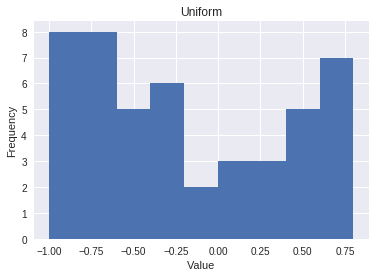

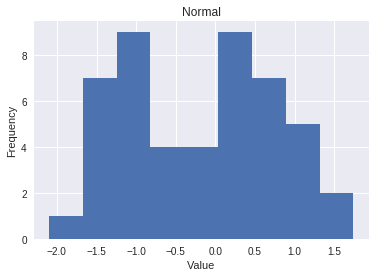

In [52]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 

tf.reset_default_graph()

uniform = tf.random_uniform((50, 1), minval=-1, maxval=1)

normal = tf.random_normal((50, 1), mean=0, stddev=1,)

with tf.Session() as sess:
    plt.hist(sess.run(uniform), bins=[(i*2/10)-1 for i in range(10)])
    plt.title("Uniform")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    
    norm_= sess.run(normal)
    plt.hist(norm_, bins=[min(norm_)[0]+i*((max(norm_)[0]-min(norm_)[0])/10) for i in range(10)])
    plt.title("Normal")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

### Exe. 7

Faça um grafo que calcule os pontos de uma senóide para ser plotada no intervalo `[0,2*pi]`. A equação da senóide é da forma `y = A*sin(w*t)`. Crie nós de entrada `A` e `w` para que os parâmetros sejam recebidos em tempo de execução. 

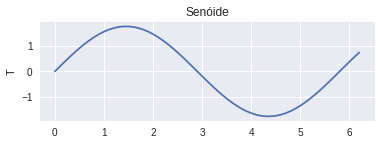

In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline


tf.reset_default_graph()

# Model parameters
W = tf.Variable(tf.random_normal([1, 1]), name='W')
A = tf.Variable(tf.random_normal([1, 1]), name='A')
init = tf.global_variables_initializer()

# training data
t = np.arange(0, math.pi*2, 0.1)
linear_model = A*tf.sin(W*t)
with tf.Session() as sess:
    sess.run(init)
    linear_model = sess.run(linear_model)

fig = plt.figure(1)

ax1 = fig.add_subplot(211)
ax1.plot(t, linear_model[0])
ax1.grid(True)
ax1.set_ylabel('T')
ax1.set_title('Senóide')

plt.show()

### Exe. 8

O método de Montecarlo é um método numérico probabilístico muito utilizado em computação. Uma das aplicações é calcular aproximadamente o valor de $\pi$. Para fazer isto, a sequência de passos deve ser:

1) Gere um ponto aleatório $(x,y)$ dentro do quadrado $[-1,1]\times[-1,1]$, onde cada coordenada tem distribuição uniforme.

2) Verifique se o ponto está, ou não, dentro do círculo de raio $1$ e centro na origem.

3) Repita os passos 1 e 2 por $n$ iterações, guardando o número de pontos dentro do círculo.

4) Aproxime $\pi$ por $4$ vezes a razão entre o número de pontos que são gerados dentro e o total de pontos gerados. Isto é válido pois o número de pontos dentro do círculo é proporcional à razão das áreas:
$$\frac{A_{circ}}{A_{quad}} = \frac{\pi R^2}{4 R^2} = \frac{\pi}{4} $$

Implemente o método de Montecarlo para esta finalidade em TensorFlow.

In [29]:
import tensorflow as tf

tf.reset_default_graph()


radius = tf.constant(1., name='r')
n = 50
x = tf.Variable(tf.random_uniform([n,1]), name='x')
y = tf.Variable(tf.random_uniform([n,1]), name='y')
init = tf.global_variables_initializer()

location = tf.stack([tf.less(tf.sqrt(tf.square(x[i]) + tf.square(y[i])), radius) for i in range(n)])

montecarlo = 0
with tf.Session() as sess:
    sess.run(init)
    insiders = sess.run(tf.shape(sess.run(tf.where(location)))[0])
    montecarlo = insiders*4/n

print(montecarlo)

3.04


### Exe. 9

TensorFlow também possui controle de fluxo por meio de condicionais e loops. 

Implemente um grafo que receba dois valors numéricos e um booleano. Dependendo do valor do booleano, o grafo deve retornar o produto (se `True`) ou a soma (se `False`) dos valores numéricos.

In [2]:
import tensorflow as tf

tf.reset_default_graph()

c = tf.constant(False, tf.bool)
x = tf.constant(15, name="x")
y = tf.constant(10, name="y")

if_stm = tf.cond(c, lambda: x*y, lambda: x+y)

with tf.Session() as sess:
    print(sess.run(if_stm))

25


### Exe. 10

A sequência de Fibonacci é uma sequência de grande importância na Teoria dos Números. Ela é recursiva, onde o n-ésimo termo é a soma dos dois anteriores.
$$ a_n = a_{n-1} + a_{n-2} $$
Utilizando loops em TensorFlow, faça um grafo que liste os `n` primeiros termos da sequência de Fibonacci.

In [87]:
import tensorflow as tf

tf.reset_default_graph()

n = tf.constant(10)
fib_0 = tf.Variable(0, name = "fib_0")
fib_1 = tf.Variable(1, name = "fib_1")
fib_numbers = tf.Variable(0, name = "fib_numbers")
init = tf.global_variables_initializer()

cond = lambda fib_numbers, fib_0, fib_1: tf.less(fib_numbers, n)

def fib(fib_numbers, fib_0, fib_1):
    fib_0 = tf.Print(fib_0, [fib_0])
    fib_1 = tf.Print(fib_1, [fib_1])
    return tf.add(fib_numbers, 1), fib_1, tf.add(fib_0, fib_1)

#body = lambda fib_numbers: tf.add(fib_numbers, fib_numbers+1)

loops = tf.stack(tf.while_loop(cond, fib , [fib_numbers, fib_0, fib_1]))

with tf.Session() as sess:
    sess.run(init)
    _, num1, num2 = sess.run(loops)
    
    while num1!=0:
        res = num2-num1
        num2 = num1
        num1 = res
        print(num1)

34
21
13
8
5
3
2
1
1
0


### Exe. 11

Equações diferenciais modelam fenômenos em todas as áreas da engenharia. Uma aplicação fundamental é na análise transitória de circuitos elétricos RL, RC e RLC. 

Um circuito RLC pode ser modelado como uma equação diferencial ordinária (EDO) de segunda ordem. Para um circuito RLC série, em termos da tensão no capacitor:
$$
\frac{d^2v_C(t)}{dt^2} + \frac{R}{L}\frac{dv_C(t)}{dt} + \frac{v_C(t)}{LC} = \frac{E}{LC}
$$
onde:

R = resistência (Ohms);

L = indutância (Henrys);

C = capacitância (Farads);

E = fonte de tensão (Volts).

Implemente um grafo que resolva esta EDO para condições iniciais quaisquer dadas.

**Dica:** A função nativa `tf.contrib.integrate.odeint()` resolve apenas EDO's (ou sistemas de EDO's) de primeira ordem. Entretanto, toda EDO de ordem superior pode ser reduzida a sistemas de primeira ordem.

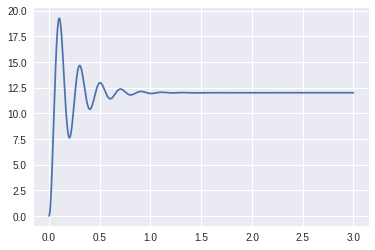

In [141]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.reset_default_graph()

"""

(a*d^2/dt) + (bdx / dt) + x = f 

x_1 = x

x_2 = dx/dt = dx_1/t

1) dx_1/dt = x_2

u dx_2/dt +bx_2 + c_1 = f

2) 
dx_2 = x_1 * c/u - x_2 * b / u + f

[dx_1/dt, dx_2/dt ] = [x_2,  -c/ux_1 -b/ux_2 + f]
"""

E = 12
R = 1
L = 0.1
C = 0.01


u = 1
b = R/L
c = 1/(L*C)
f = E/(L*C)

def diff_resolution(state, t):
  x1, x2 = tf.unstack(state)
  dx1 = x2
  dx2 = (-c/u*x1)-(b/u*x2)+f
  return tf.stack([dx1, dx2])

init_state = tf.constant([0, 0], dtype=tf.float64)
t = np.linspace(0, 3, num=5000)
tensor_state, tensor_info = tf.contrib.integrate.odeint(diff_resolution, init_state, t, full_output=True)

sess = tf.Session()
state, info = sess.run([tensor_state, tensor_info])
x1, x2 = state.T
plt.plot(t, x1)